# Boolean Quantum ROM
**Author:** Julia Cen

In this notebook, we will build a Qiskit function that takes a boolean function $f:\mathbb{F}_2^n\rightarrow \mathbb{F}_2$ and outputs a circuit, $U$, such that

$$
U|x\rangle_n|0\rangle_1 \, = \, |x\rangle_n|f(x)\rangle_1.
$$

The construction may use any number of ancillas and any controlled multi-qubit gates.

In [4]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

import numpy as np

Let us first define the boolean function. The input is a bitstring and output is a boolean value.

In [2]:
# Length of string
n = 3

# Define the boolean function
f = {
    "000": 1,
    "001": 0,
    "010": 1,
    "011": 0,
    "100": 0,
    "101": 1,
    "110": 0,
    "111": 1,
}

print(f)

{'000': 1, '001': 0, '010': 1, '011': 0, '100': 0, '101': 1, '110': 0, '111': 1}


Now we can construct the quantum ROM for general n length bitstring functions. The idea of this code to construct the quantum ROM is that it runs through all bitstring definitions given in the above dictionary. For dictionary values of 1, we append to the circuit X-gates to turn the 0s in our bitstring to 1s, then we can apply a multi-controlled gate to turn our target bit from 0 to 1 if all our control bits are 1. After this, we reverse the X-gates to return our control bits back to the orignal state.

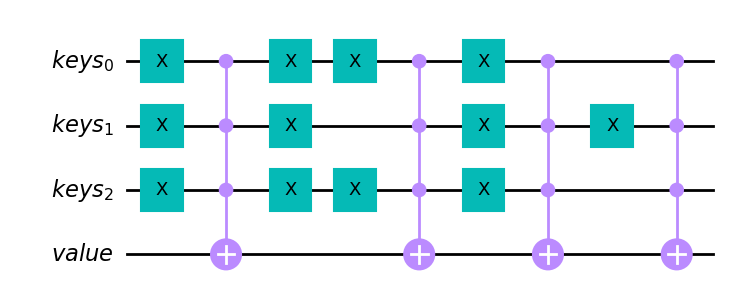

In [26]:
# Input-controls
quantum_keys = QuantumRegister(size=n, name="keys")
# Output-target
quantum_value = AncillaRegister(size=1, name="value")

qrom = QuantumCircuit(quantum_keys, quantum_value, name="qrom")


# Looping over dictionary
for fin, fout  in f.items():
    # Adds to qrom if f outputs 1
    if fout == 1:
        # Apply X gates to bits in bitstring that are 0
        for i, bit in enumerate(fin):
            if bit == '0':
                qrom.x(quantum_keys[i])

        # Apply multi-controlled X to the value qubit
        qrom.mcx(quantum_keys, quantum_value)

        # Undo the X gates
        for i, bit in enumerate(fin):
            if bit == '0':
                qrom.x(quantum_keys[i])


qrom.draw(output="mpl")